In this notebook we eill build a CNN to classify flower images. We will also see how our model verfits and how overfitting can be addressed using data augumentation. Data augumantation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

`credits`: I used tensorflow offical tutorial:https://www.tensorflow.ord/tutorials/images/classification as a reference and made bunch of changes to make it simpler. In below image, 4 new training samples are genereated from original sample using different tranformations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir = 'C:/AI/Deeplearning_codebasic/Data/datasets\\Flower_photos'

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/AI/Deeplearning_codebasic/Data/datasets/Flower_photos')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('C:/AI/Deeplearning_codebasic/Data/datasets/Flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/AI/Deeplearning_codebasic/Data/datasets/Flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/AI/Deeplearning_codebasic/Data/datasets/Flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/AI/Deeplearning_codebasic/Data/datasets/Flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/AI/Deeplearning_codebasic/Data/datasets/Flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('C:/AI/Deeplearning_codebasic/Data/datasets/Flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/AI/Deeplearning_codebasic/Data/datasets/Flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/AI/Deeplearning_codebasic/Data/datasets/Flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/AI/Deeplearning_codebasic/Data/datasets/Flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/AI/Deeplearning_codebasic/Data/datasets/Flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

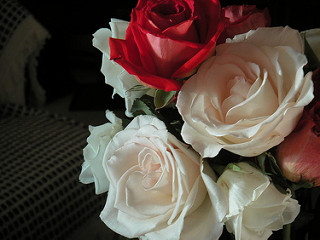

In [7]:
PIL.Image.open(str(roses[1]))

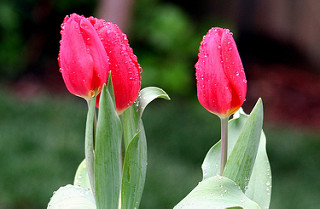

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

### read flowers images from disk into numpy array using opencv

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict={
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
flowers_images_dict['roses'][0]

WindowsPath('C:/AI/Deeplearning_codebasic/Data/datasets/Flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [12]:
str(flowers_images_dict['roses'][0])

'C:\\AI\\Deeplearning_codebasic\\Data\\datasets\\Flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

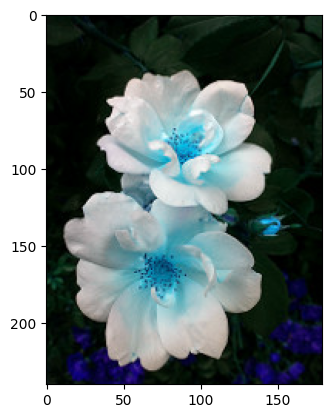

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
plt.imshow(img)

In [14]:
img.shape

(240, 179, 3)

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name]) # chuyển y giá trị thành label 0,1,2,3,4

In [17]:
X = np.array(X)
y = np.array(y)

### train test split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [22]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

#### Built convolutional neural network and train it

In [23]:
num_classes = 5
model = Sequential([
    layers.Conv2D(16,3,padding = 'same',activation = 'relu'),
    layers.MaxPool2D(),
    
    layers.Conv2D(32,3,padding= 'same',activation ='relu'),
    layers.MaxPool2D(),
    
    layers.Conv2D(64,3,padding  = 'same',activation  ='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics= ['accuracy'])

model.fit(X_train_scaled,y_train,epochs = 10)

Epoch 1/10
86/86 [==============================] - 11s 39ms/step - loss: 1.4644 - accuracy: 0.3801
Epoch 2/10
86/86 [==============================] - 3s 39ms/step - loss: 1.0739 - accuracy: 0.5614
Epoch 3/10
86/86 [==============================] - 3s 39ms/step - loss: 0.9146 - accuracy: 0.6490
Epoch 4/10
86/86 [==============================] - 3s 39ms/step - loss: 0.7489 - accuracy: 0.7169
Epoch 5/10
86/86 [==============================] - 3s 40ms/step - loss: 0.5357 - accuracy: 0.8089
Epoch 6/10
86/86 [==============================] - 3s 41ms/step - loss: 0.3314 - accuracy: 0.8884
Epoch 7/10
86/86 [==============================] - 3s 41ms/step - loss: 0.1948 - accuracy: 0.9400
Epoch 8/10
86/86 [==============================] - 3s 40ms/step - loss: 0.1099 - accuracy: 0.9709
Epoch 9/10
86/86 [==============================] - 4s 41ms/step - loss: 0.0591 - accuracy: 0.9858
Epoch 10/10
86/86 [==============================] - 3s 39ms/step - loss: 0.0537 - accuracy: 0.9858


In [ ]:
model.evaluate(X_test_scaled,y_test)

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

In [ ]:
np.argmax(predictions[4])

In [ ]:
np.argmax(tf.nn.softmax(predictions[4]))

### Improve Test Accuracy using Data Augumentation

In [ ]:
img_height,img_width =180,180

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    


In [ ]:
model.evaluate(X_test_scaled,y_test)

plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))